In [63]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [64]:
df = pandas.read_csv('dados-es.csv', delimiter=';', encoding='latin1')

In [65]:
# Ajustes na tabela
df = df.rename(columns={"ÿid" : "id"})

In [66]:
df['evolucaoCaso'].unique()

array([nan, 'Cura', 'Em tratamento domiciliar', 'Cancelado', 'Ignorado',
       'Internado em UTI', 'Óbito', 'Internado'], dtype=object)

In [67]:
df = df.dropna(subset=['idade','evolucaoCaso'])

<AxesSubplot:>

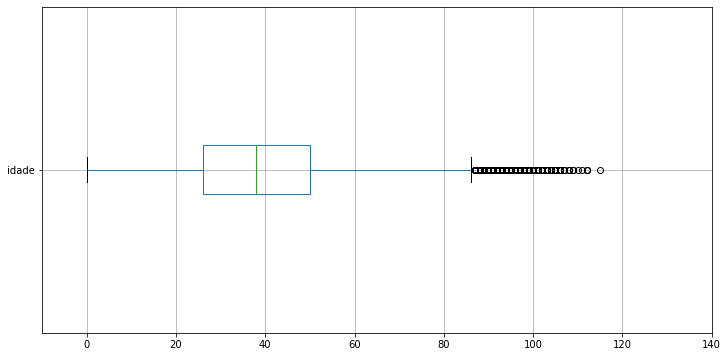

In [68]:
fig, myax = plt.subplots(figsize=(12, 6))
myax.set_xlim([-10, 140])

df.boxplot(column='idade', vert=False, figsize=(10,5), ax=myax)

In [80]:
df_rec = df[df['idade']<110]

In [81]:
df_rec = df_rec[['id', 'idade', 'evolucaoCaso']]
# df_rec.head()
# df_rec = df_rec.loc[df['evolucaoCaso']=='Cura']['idade']

In [82]:
df_rec = df_rec.loc[df_rec['evolucaoCaso'].isin(['Cura', 'Internado', 'Internado em UTI', 'Em tratamento domiciliar', 'Óbito'])]

In [166]:
contagem_evolucaoCaso = df_rec.groupby(pandas.cut(df_rec['idade'], np.arange(0, 110, 1), right=False, include_lowest=True))['evolucaoCaso'].value_counts()
# aux  = df_rec.groupby(df_rec['idade']).count()

# aux.to_frame()

df_propCurados = pandas.DataFrame(columns=['idade', 'totalCasos', 'totalCurados', 'propCurados'])

dicio_dataCurados = { }


# 'Traduzir' contagem_evolucaoCaso para um dicionario
# Criando dicionario para guardar totalCasos e totalCurados com base no intervalo da idade 
for index in range(0, len(contagem_evolucaoCaso.keys())):
    idade = str (contagem_evolucaoCaso.keys()[index][0])
    
    if idade not in dicio_dataCurados:
        dicio_dataCurados[idade] = {'totalCasos' : 0, 'totalCurados' : 0}
        
    dicio_dataCurados[idade]['totalCasos'] += contagem_evolucaoCaso[index] 
    
    if contagem_evolucaoCaso.keys()[index][1] == 'Cura':
        dicio_dataCurados[idade]['totalCurados'] += contagem_evolucaoCaso[index]


for idade in dicio_dataCurados.keys():
    dicio_dataCurados[idade]['idade'] = idade
    dicio_dataCurados[idade]['propCurados'] = dicio_dataCurados[idade]['totalCurados'] / dicio_dataCurados[idade]['totalCasos']
    df_propCurados = df_propCurados.append(dicio_dataCurados[idade], ignore_index=True)
    
    #print(dicio_dataCurados[idade])
    
    
#df_propCurados.to_csv('teste.csv')
pandas.set_option("max_rows", None)
display(df_propCurados)
        
#print(dicio_dataCurados)

# df_rec.groupby(['idade']).value_counts()

,idade,totalCasos,totalCurados,propCurados
0,"[0, 1)",194,191,0.984536
1,"[1, 2)",749,738,0.985314
2,"[2, 3)",673,673,1.000000
3,"[3, 4)",566,563,0.994700
4,"[4, 5)",440,437,0.993182
5,"[5, 6)",414,414,1.000000
6,"[6, 7)",418,416,0.995215
7,"[7, 8)",481,480,0.997921
8,"[8, 9)",525,523,0.996190
9,"[9, 10)",487,486,0.997947


In [ ]:
df_propCurados[]

In [77]:
display(df_rec)

,id,idade,evolucaoCaso
10,fABnBmBbyh,52.0,Cura
21,WCAB04JsDh,24.0,Em tratamento domiciliar
27,jSKDRia9v9,45.0,Cura
61,rW4VZvLQa8,55.0,Cura
131,5rZ5zRjTcV,38.0,Em tratamento domiciliar
...,...,...,...
949726,OI5N5OEeKD,34.0,Cura
949730,FziS4ZV740,56.0,Cura
949934,F0Rh1ShLlx,65.0,Cura
949941,xVypapQj2B,83.0,Cura


In [ ]:
display(df)